In [1]:


import csv
import pandas as pd
# df = pd.read_csv('drop.csv')
df = pd.read_csv('quoref.csv')
# df = pd.read_csv('squad.csv')  

        


In [2]:
df

,name,Index,Name,Type,num,uniq_num,null,distinct_1,distinct_2,distinct_3,...,oracle_r2,oracle_rl,sp1_1_r1,sp1_1_r2,sp1_1_rl,sp1_1_mauve,sp1_1_gram,sp1_1_gpt,sp1_1_meteor,sp1_1_bleu
0,quoref_bs_25_10_2_False_0.0_0.0_5_None_1.0_1_0...,0,NaN,BeamSearch,10.0,10.0,1.0,44.5,48.2,46.3,...,12.2,29.4,25.0,7.6,22.5,61.3,91.4,505.6,19.3,4.2
1,quoref_bs_25_10_2_False_0.0_0.0_5_None_1.0_5_0...,1,NaN,BeamSearch,10.0,9.3,1.0,50.7,50.5,46.0,...,10.1,26.7,23.2,6.9,20.3,54.7,84.9,460.9,17.5,3.7
2,quoref_bs_25_10_2_False_0.0_0.0_5_None_1.0_10_...,2,NaN,BeamSearch,10.0,9.1,1.0,55.2,52.4,45.5,...,6.8,23.3,19.8,4.0,16.6,21.3,84.3,539.8,14.3,1.7
3,quoref_sample_25_10_2_False_0.0_0.0_5_0.2_1.0_...,3,NaN,BS+Sample,10.0,1.4,1.0,29.9,27.8,24.3,...,7.0,22.0,23.5,6.7,21.4,53.5,90.8,461.6,18.3,4.1
4,quoref_sample_25_10_2_False_0.0_0.0_5_0.5_1.0_...,4,NaN,BS+Sample,10.0,1.6,1.0,30.5,28.4,24.7,...,7.5,22.7,24.7,7.2,22.4,48.1,92.5,415.2,19.2,4.6
5,quoref_sample_25_10_2_False_0.0_0.0_5_0.8_1.0_...,5,NaN,BS+Sample,10.0,1.6,1.0,30.5,28.4,24.8,...,7.9,23.7,24.5,7.4,22.7,50.6,91.3,438.3,18.9,4.6
6,quoref_sample_25_10_2_False_0.0_0.0_5_None_0.5...,6,NaN,BS+Sample,10.0,1.2,1.0,28.1,25.0,21.1,...,7.0,22.7,24.9,7.0,22.8,51.2,92.3,390.0,18.2,3.9
7,quoref_sample_25_10_2_False_0.0_0.0_5_None_0.8...,7,NaN,BS+Sample,10.0,1.6,1.0,30.1,28.0,24.4,...,7.9,23.7,25.1,7.3,23.1,49.9,92.5,394.9,19.1,4.7
8,quoref_sample_25_10_2_False_0.0_0.0_5_None_0.9...,8,NaN,BS+Sample,10.0,1.8,1.0,30.8,28.7,25.2,...,8.2,24.0,25.1,7.5,23.0,58.6,91.2,404.7,19.3,4.9
9,quoref_sample1_25_10_2_False_0.0_0.0_5_0.2_1.0...,9,NaN,Sample,10.0,5.4,1.0,44.4,46.2,42.4,...,7.3,23.9,23.2,6.3,21.1,50.9,88.3,487.5,18.1,2.7


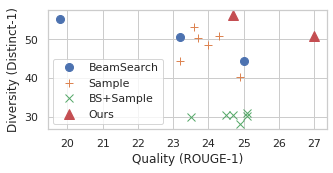

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(5,2.2))
pal = sns.color_palette("crest")

groups = df.groupby('Type')
from itertools import cycle

markers = ['x', 'o', '^','+']

xname = 'sp1_1_r1'
yname = 'distinct_1'
# Plot
# fig, ax = plt.subplots(figsize=(6,6))
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for (name, group), marker in zip(groups, cycle(markers)):
    if name  == 'BeamSearch':
        ax.plot(group[xname], group[yname], marker=marker, linestyle='', ms=8, label=name)
for (name, group), marker in zip(groups, cycle(markers)):
    if name  == 'Sample':
        ax.plot(group[xname], group[yname], marker=marker, linestyle='', ms=8, label=name)
for (name, group), marker in zip(groups, cycle(markers)):
    if name  == 'BS+Sample':
        ax.plot(group[xname], group[yname], marker=marker, linestyle='',  ms=8, label=name)
for (name, group), marker in zip(groups, cycle(markers)):
    if name  == 'Ours':
        ax.plot(group[xname], group[yname], marker=marker, linestyle='', ms=10, label=name)
ax.legend()

ax.set_xlabel("Quality (ROUGE-1)")
ax.set_ylabel("Diversity (Distinct-1)")

plt.savefig("fig_quoref.pdf", dpi=400, bbox_inches='tight')

plt.show()

In [10]:
groups = df.groupby('Type')

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

groups = df.groupby('Type')
from itertools import cycle

markers = ['x', 'o', '^','+']

xname = 'sp1_1_mauve'
yname = 'sp1_1_meteor'
# Plot
fig, ax = plt.subplots(figsize=(6,6))
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for (name, group), marker in zip(groups, cycle(markers)):
    ax.plot(group[xname], group[yname], marker=marker, linestyle='', ms=12, label=name)
ax.legend()

ax.set_xlabel("Naturalness (MAUVE)")
ax.set_ylabel("Quality (METEOR)")

plt.savefig("fig_quoref_mauve.png", dpi=500,bbox_inches='tight')

plt.show()

NameError: name 'df' is not defined

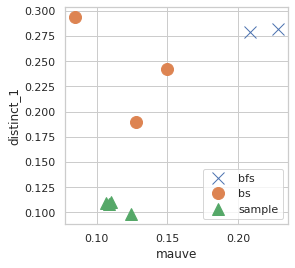

In [46]:
xname = 'mauve'
yname = 'distinct_1'
# Plot
fig, ax = plt.subplots(figsize=(4, 4))
# ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for (name, group), marker in zip(groups, cycle(markers)):
    ax.plot(group[xname], group[yname], marker=marker, linestyle='', ms=12, label=name)
ax.legend()

ax.set_xlabel(xname)
ax.set_ylabel(yname)
plt.show()

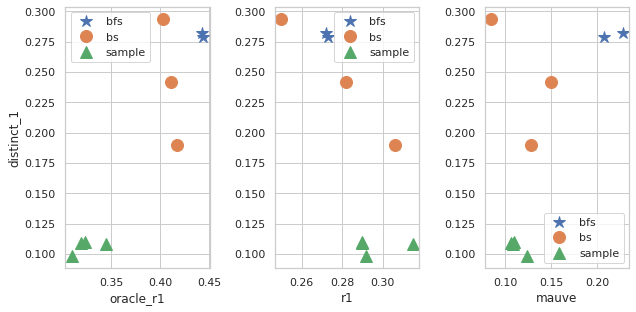

In [59]:

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 4.5), tight_layout=True)


groups = df.groupby('label')


markers = ['*', 'o', '^']

def draw_sub(axis, xname, yname):

    # ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for (name, group), marker in zip(groups, cycle(markers)):
        axis.plot(group[xname], group[yname], marker=marker,  linestyle='', ms=12, label=name)
    axis.legend()
    axis.set_xlabel(xname)
    # axis.set_ylabel(yname)

draw_sub(ax1,xname = 'oracle_r1',yname = 'distinct_1')
draw_sub(ax2,xname = 'r1',yname = 'distinct_1')
draw_sub(ax3,xname = 'mauve',yname = 'distinct_1')
ax1.set_ylabel(yname)

plt.savefig("fig_drop.pdf", dpi=400,bbox_inches='tight')
plt.show()
